<a href="https://colab.research.google.com/github/saketlakhotia17/IBM_MachineLearning/blob/main/5.%20K%20Nearest%20Neighbor%20(Algorithm)/Exp6_ML_I027(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 6 - K Nearest Neighbor (Algorithm)

In [ ]:
import pandas as pd
from math import sqrt

In [ ]:
df = pd.read_csv('test_knn.csv')
df

,height,weight,underweight
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


In [ ]:
#Step 1 : Calculate Euclidean distance
#Step 2 : Identify k-nearest neighbor
#Step 3 : Predict class/label/output

def euclidean_distance(row1,row2):
    dist=0.0
    ln=len(row1)
    for i in range (0,ln-1):
        temp=(row1[i]-row2[i])**2
        dist=dist+temp
    euc_dist=sqrt(dist)
    return euc_dist

In [ ]:
#Step 1
test_data=df.to_numpy()
test_row=test_data[0]
for r in test_data:
    distance=euclidean_distance(r,test_row)
    print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.559143938554055
0.5356280721938492
4.850940186986409
2.592833759950511
4.214227042632867
6.522409988228339
4.985585382449795


In [ ]:
#Step 2
def get_neighbors(train, test_row, k):
  d = list()
  for t_row in train:
    e_d = euclidean_distance(t_row, test_row)
    d.append((t_row,e_d))
    d.sort(key=lambda tup:tup[1])
    neighbors = list()
  for i in range(k):
    neighbors.append(d[i][0])
  return neighbors, d


In [ ]:
k_neighbors, all_dist = get_neighbors(test_data,test_data[0],3)
print('Distances')

for ad in all_dist:
  print(ad)

  

print('\nK nearest neighbours')
for n in k_neighbors:
  print(n)

Distances
(array([2.7810836, 2.550537 , 0.       ]), 0.0)
(array([3.06407232, 3.00530597, 0.        ]), 0.5356280721938492)
(array([1.46548937, 2.36212508, 0.        ]), 1.3290173915275787)
(array([1.38807019, 1.85022032, 0.        ]), 1.559143938554055)
(array([3.39656169, 4.40029353, 0.        ]), 1.9494646655653247)
(array([5.33244125, 2.08862677, 1.        ]), 2.592833759950511)
(array([6.92259672, 1.77106367, 1.        ]), 4.214227042632867)
(array([7.62753121, 2.75926224, 1.        ]), 4.850940186986409)
(array([7.67375647, 3.50856301, 1.        ]), 4.985585382449795)
(array([ 8.67541865, -0.24206865,  1.        ]), 6.522409988228339)

K nearest neighbours
[2.7810836 2.550537  0.       ]
[3.06407232 3.00530597 0.        ]
[1.46548937 2.36212508 0.        ]


In [ ]:
#Step 3

def pred_class(train, test_row, k):
  nei,eucl_dist=get_neighbors(train, test_row, k)
  output_class = [r[-1] for r in nei]
  prediction = max(set(output_class), key=output_class.count)
  return prediction

In [ ]:
predict_underweight = pred_class(test_data,test_data[0],3)
print('Actual Class', test_data[0][-1])
print('Predicted Class', predict_underweight)

Actual Class 0.0
Predicted Class 0.0


In [ ]:
predict_underweight = pred_class(test_data,test_data[5],5)
print('Actual Class', test_data[0][-1])
print('Predicted Class', predict_underweight)

Actual Class 0.0
Predicted Class 1.0


In [ ]:
df = pd.read_csv('iris_data.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

NameError: ignored

In [ ]:
scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


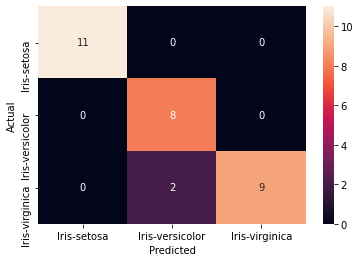

In [ ]:
import seaborn as sn

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot= True)

In [ ]:
# Accuracy = 28 / 30 = 93.33%

# Conclusion

**Part 1:**

For the given dataset of 10 samples, K nearest Neighbor algo is applied. Its is found that step by step implementation of this algorithm shows correct classification. the above algo was tested for k=3 and for k=5. For both the cases, results classification is correct.


**Part 2:**

Knn algorithm is applied for iris data of 150 rows/samples.
For 80% of training data and 20% of test data, classifier shows 93.33%.